In [ ]:
✅ Step 1: Objective
We want to predict whether a user is interested in an event (Interested = 1) or not (Interested = 0), based on features like:

Age

Gender

Past Event Attendance

Event Category

Ticket Price

Event Location

Preferred Time



In [1]:
! pip install pandas scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("event_interest_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Check the columns
print("Available columns:", df.columns.tolist())


Available columns: ['user_id', 'age', 'event_type', 'location', 'interest']


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("event_interest_dataset.csv")

# Encode categorical features
le = LabelEncoder()
df['event_type'] = le.fit_transform(df['event_type'])
df['location'] = le.fit_transform(df['location'])

# Features and target
X = df[["age", "event_type", "location"]]
y = df["interest"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with class weights to handle imbalance
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


✅ Accuracy: 0.625

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



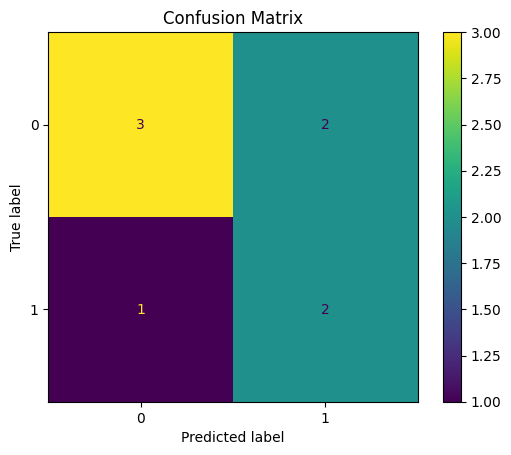

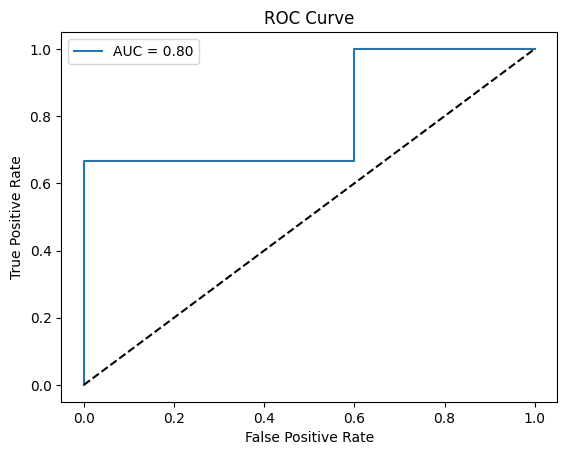

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],  # Only 'l2' is supported with lbfgs
    'class_weight': ['balanced', None]
}

# Create base model
log_reg = LogisticRegression(max_iter=1000)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("🔍 Best Parameters Found:", grid_search.best_params_)
print("✅ Best Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔍 Best Parameters Found: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best Accuracy Score: 0.7761904761904762


In [16]:
results = X_test.copy()
results["Actual"] = y_test
results["Predicted"] = y_pred
results.to_csv("event_interest_predictions.csv", index=False)


In [17]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
}).sort_values(by="Importance", key=abs, ascending=False)

print(importance)


      Feature  Importance
1  event_type    1.460202
2    location   -0.792728
0         age    0.010707


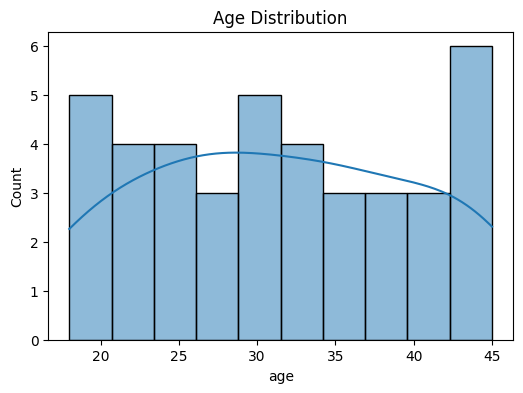

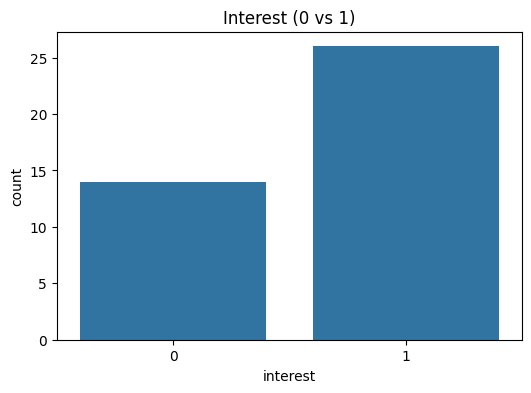

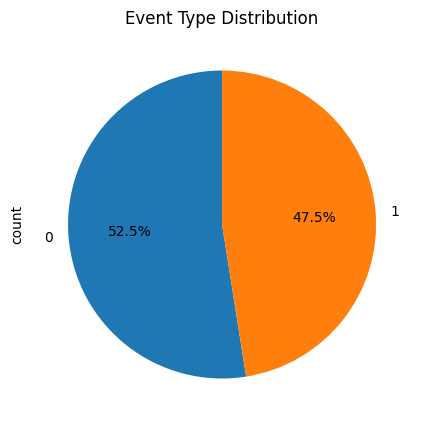

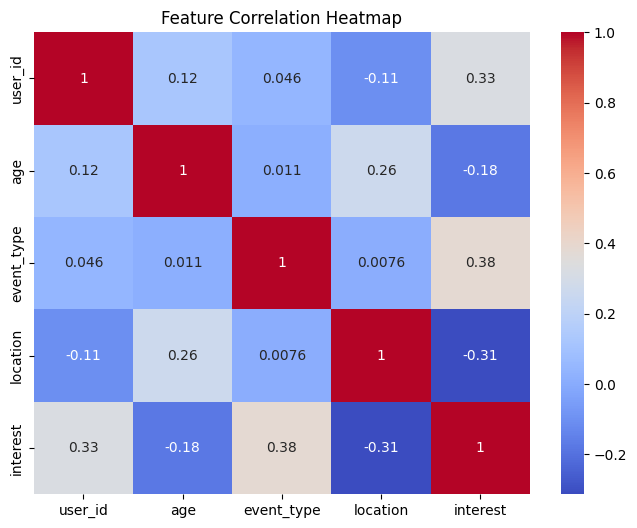

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("event_interest_dataset.csv")

# Histogram: Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.savefig("age_distribution.png")

# Countplot: Interest
plt.figure(figsize=(6,4))
sns.countplot(x='interest', data=df)
plt.title("Interest (0 vs 1)")
plt.savefig("interest_countplot.png")

# Pie chart: Event types
plt.figure(figsize=(5,5))
df['event_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Event Type Distribution")
plt.savefig("event_type_pie.png")

# Heatmap: Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")


In [19]:
!pip install shap


   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.8 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.6 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 1.8 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.8 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


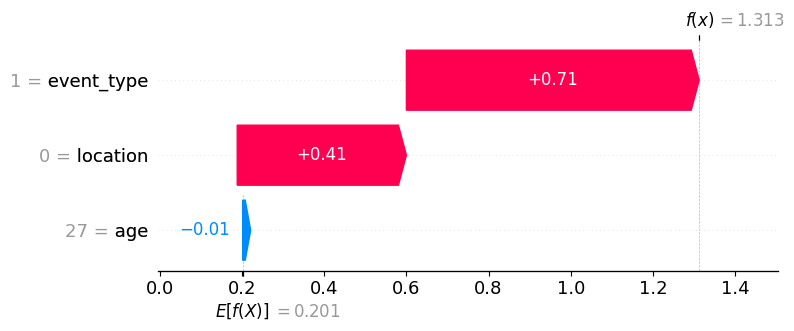

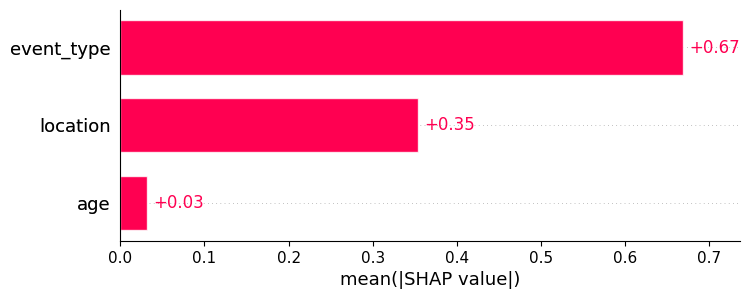

In [20]:
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("event_interest_dataset.csv")
df["event_type"] = LabelEncoder().fit_transform(df["event_type"])
df["location"] = LabelEncoder().fit_transform(df["location"])
X = df[["age", "event_type", "location"]]
y = df["interest"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test[:10])

# Visualize first 10 predictions
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)


In [22]:
# After model is trained
probs = model.predict_proba(X_test)

print("\n🔍 Sample Predictions with Confidence Scores:")
for i in range(5):
    sample = X_test.iloc[i:i+1]  # Keeps feature names
    prediction = model.predict(sample)[0]
    confidence = probs[i][1]  # Confidence for class '1'
    print(f"Prediction: {prediction}, Confidence: {confidence:.2f}")



🔍 Sample Predictions with Confidence Scores:
Prediction: 1, Confidence: 0.79
Prediction: 0, Confidence: 0.33
Prediction: 0, Confidence: 0.49
Prediction: 0, Confidence: 0.33
Prediction: 1, Confidence: 0.66


In [23]:
import joblib
joblib.dump(model, "event_interest_model.pkl")


['event_interest_model.pkl']

In [24]:
model = joblib.load("event_interest_model.pkl")


In [27]:
import mysql.connector

# Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="survi09mukh",   # replace with your actual password
    database="eventchain"
)

cursor = conn.cursor()


In [33]:
import pandas as pd
import numpy as np
import mysql.connector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
df = pd.read_csv("event_interest_dataset.csv")

# 2. Encode categorical columns
le = LabelEncoder()
df["event_type"] = le.fit_transform(df["event_type"])
df["location"] = le.fit_transform(df["location"])

# 3. Features & target
X = df[["age", "event_type", "location"]]
y = df["interest"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model with class weights
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 7. Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 8. Save predictions to MySQL
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="survi09mukh",  # 🔁 Change this
        database="eventchain"            # 🔁 Change this if needed
    )
    cursor = conn.cursor()

    for i in range(len(y_test)):
        age = int(X_test.iloc[i]["age"])
        event_type = int(X_test.iloc[i]["event_type"])
        location = int(X_test.iloc[i]["location"])
        prediction = int(y_pred[i])
        confidence = float(np.max(y_proba[i]))

        cursor.execute(
            "INSERT INTO predictions (age, event_type, location, predicted_interest, confidence) VALUES (%s, %s, %s, %s, %s)",
            (age, event_type, location, prediction, confidence)
        )

    conn.commit()
    cursor.close()
    conn.close()
    print("✅ Predictions saved to MySQL successfully!")

except mysql.connector.Error as err:
    print("❌ MySQL Error:", err)


✅ Accuracy: 0.625

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8

✅ Predictions saved to MySQL successfully!
